Utilice Pandas para importar los datos desde "fcc-forum-pageviews.csv". Establezca el índice en el date columna.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv")

Limpie los datos filtrando los días en que las páginas vistas estaban en el 2,5 % superior del conjunto de datos o en el 2,5 % inferior del conjunto de datos.

1304 filas

In [3]:
df = df[
    (df["value"] >= df['value'].quantile(0.025))& 
    (df["value"] <= df['value'].quantile(0.975))
]


Crea un draw_line_plot función que utiliza Matplotlib para dibujar un gráfico de líneas similar a "examples/Figure_1.png". El título debería ser Daily freeCodeCamp Forum Page Views 5/2016-12/2019. La etiqueta en el eje x debe ser Date y la etiqueta en el eje y debe ser Page Views.

In [4]:
df["date"] = pd.to_datetime(df["date"])
df.set_index('date', inplace=True)

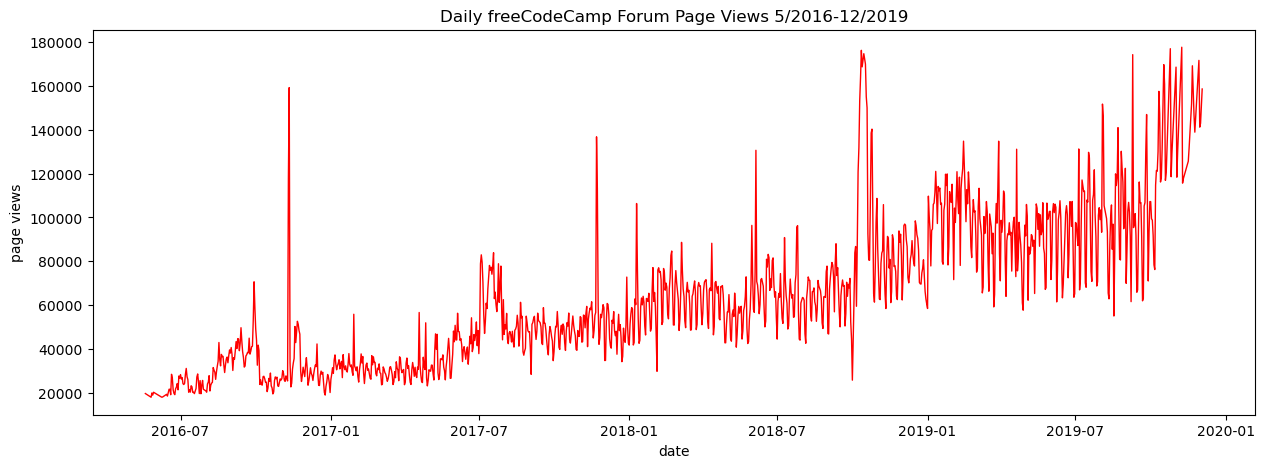

In [5]:

plt.figure(figsize=(15,5))
plt.plot(df["value"], color="red",linewidth = 1)
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.ylabel("page views")
plt.xlabel("date")
plt.show()

Crea un draw_bar_plot función que dibuja un gráfico de barras similar a "examples/Figure_2.png". Debe mostrar el promedio diario de páginas vistas para cada mes agrupadas por año. La leyenda debe mostrar etiquetas de meses y tener un título de Months. En el gráfico, la etiqueta en el eje x debe estar Years y la etiqueta en el eje y debe ser Average Page Views.

In [6]:
df["year"] = df.index.year
df["month"] = df.index.month_name()

In [7]:
df["month"] = pd.Categorical(
    df['month'],
    categories=[
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ],
    ordered=True
)

In [9]:
agrupados = df.groupby(["year","month"]).mean()

C:\Users\eldem\AppData\Local\Temp\ipykernel_1048\2145247833.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupados = df.groupby(["year","month"]).mean()


In [ ]:
agrupados = agrupados.reset_index()  
PivotTable = agrupados.pivot(index = "year",columns="month", values="value")

In [11]:
PivotTable 

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


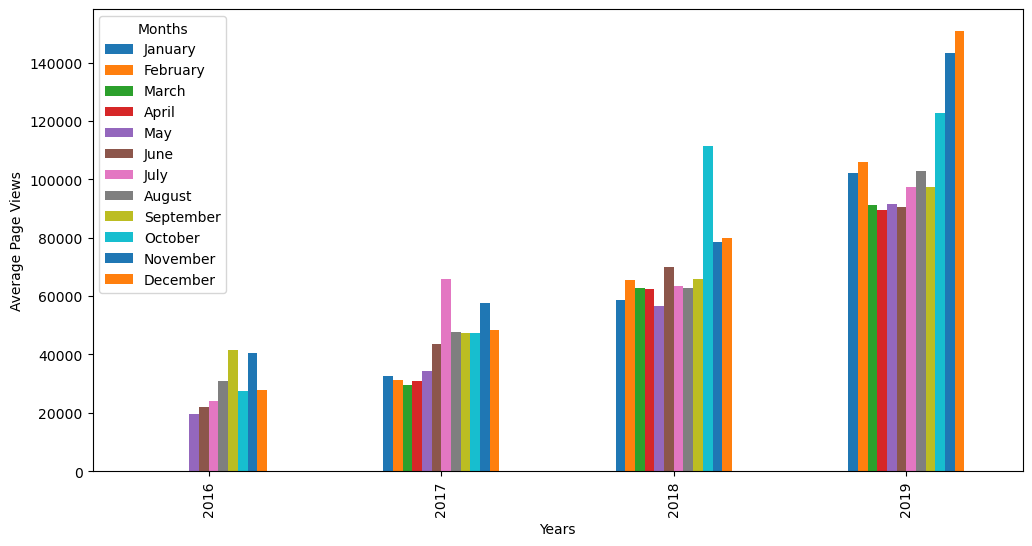

In [12]:
PivotTable.plot(kind='bar',figsize=(12,6))

plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title = 'Months')
plt.show()

Crea un draw_box_plot función que utiliza Seaborn para dibujar dos diagramas de caja adyacentes similares a "examples/Figure_3.png". Estos diagramas de caja deben mostrar cómo se distribuyen los valores dentro de un año o mes determinado y cómo se comparan a lo largo del tiempo. El título del primer gráfico debe ser Year-wise Box Plot (Trend) y el título del segundo gráfico debería ser Month-wise Box Plot (Seasonality). Asegúrese de que las etiquetas de los meses en la parte inferior comiencen en Jan y los ejes x e y están etiquetados correctamente. El código repetitivo incluye comandos para preparar los datos.

In [13]:
DfOp = df.copy()
DfOp['month'] = DfOp.index.month_name().str.slice(stop=3)

In [14]:
DfOp['month'] = pd.Categorical(
    DfOp['month'],
    categories=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ]
)

C:\Users\eldem\AppData\Local\Temp\ipykernel_1048\2893898871.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'year' , y = 'value', data= DfOp , ax=axes[0] , palette= 'Set2')
C:\Users\eldem\AppData\Local\Temp\ipykernel_1048\2893898871.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'month' , y = 'value', data= DfOp , ax=axes[1], palette= 'Set2')


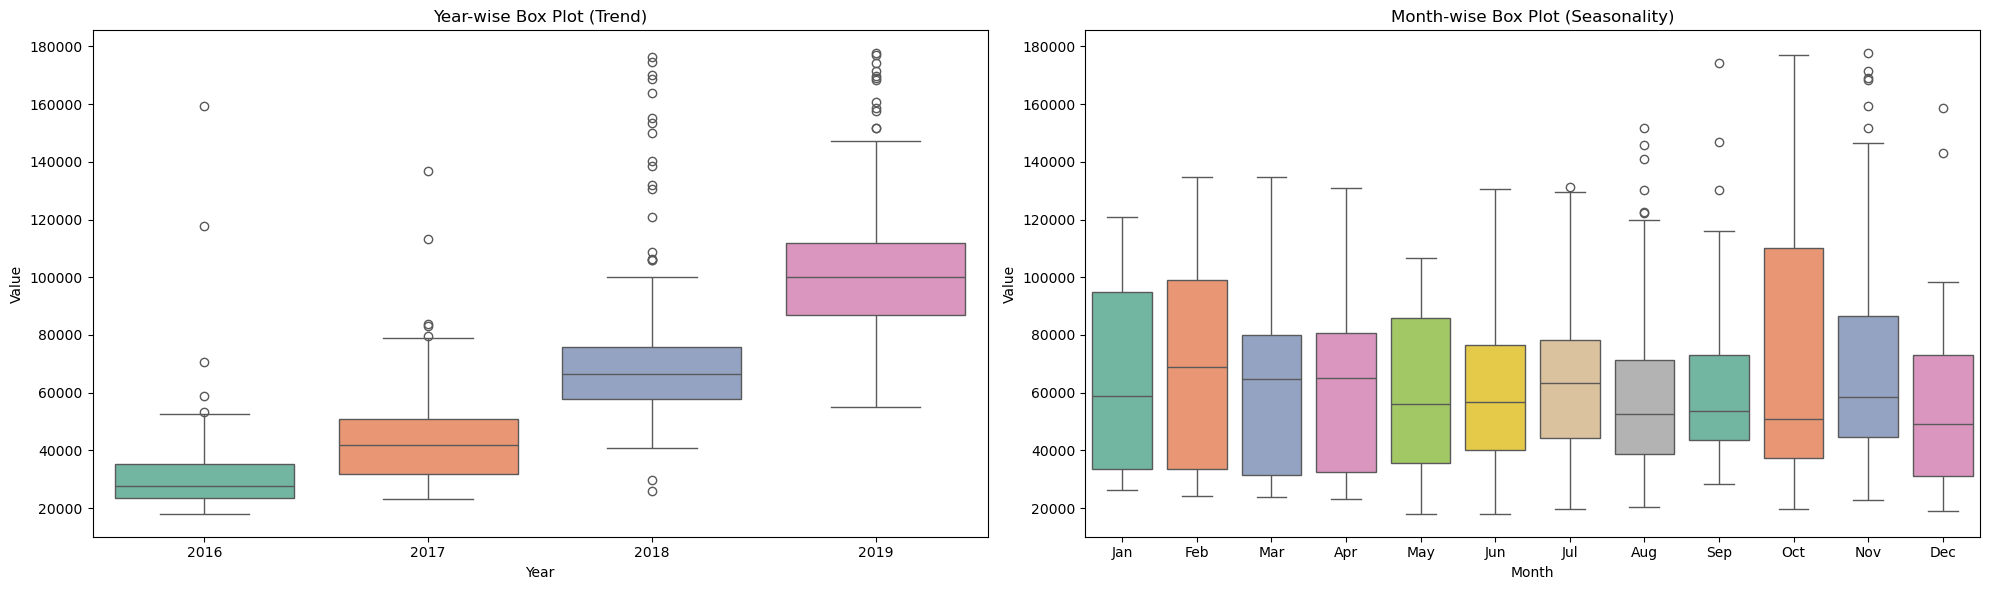

In [15]:
fig , axes = plt.subplots(1,2, figsize = (20,6))

sns.boxplot(x = 'year' , y = 'value', data= DfOp , ax=axes[0] , palette= 'Set2')
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Value')

sns.boxplot(x = 'month' , y = 'value', data= DfOp , ax=axes[1], palette= 'Set2')
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()